In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Organize a Data Frame of Observations

## Read the patient ids into a column

In [4]:
data = pd.read_csv("observations.csv")

patient_ids = set()

for patient_id in data["PATIENT"]:
    patient_ids.add(patient_id)
patient_ids = list(patient_ids)
patient_ids.sort()

## Set the column names

In [5]:
columns = ["patient_id", "Body Height", "Body Weight", "Body Mass Index", "Body temperature", 
          "Respiratory rate", "Systolic Blood Pressure", "Triglycerides", "Hemoglobin [Mass/volume] in Blood"]
df = pd.DataFrame(columns = columns)
df["patient_id"] = patient_ids
df.head()

,patient_id,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood
0,00185faa-2760-4218-9bf5-db301acf8274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0042862c-9889-4a2e-b782-fac1e540ecb4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0047123f-12e7-486c-82df-53b3a450e365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010d4a3a-2316-45ed-ae15-16f01c611674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01207ecd-9dff-4754-8887-4652eda231e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Loop through each row of the observations dataframe, and populate lists of the patient, description (type of observation), and value of the observation

In [18]:
patients = []
descriptions = []
values = []   

for index, row in data[["PATIENT", "DESCRIPTION", "VALUE"]].iterrows():
    if row["DESCRIPTION"] in columns:
        for column in columns:
            if row["DESCRIPTION"] == column:
                patients.append(row["PATIENT"])
                descriptions.append(column)
                values.append(row["VALUE"])
                       

                       
                       
                           
                       


[('034e9e3b-2def-4559-bb2a-7850888ae060', 'Body Height', '193.3'), ('034e9e3b-2def-4559-bb2a-7850888ae060', 'Body Weight', '87.8'), ('034e9e3b-2def-4559-bb2a-7850888ae060', 'Body Mass Index', '23.5'), ('034e9e3b-2def-4559-bb2a-7850888ae060', 'Systolic Blood Pressure', '119.0'), ('034e9e3b-2def-4559-bb2a-7850888ae060', 'Respiratory rate', '14.0')]


## For each patient, description, and value, add the value under the correct column in the correct patient's row

In [31]:

for index, row in df.iterrows():
    for pat, desc, val in zip(patients, descriptions, values):
        if pat == row["patient_id"]:
            df.loc[df.patient_id == pat, desc] = val
            


In [42]:
# df = df.set_index("patient_id", drop = False)
df.head()

,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood
patient_id,,,,,,,,
00185faa-2760-4218-9bf5-db301acf8274,177.7,64.9,20.6,37.5,14.0,107.0,NaN,13.6
0042862c-9889-4a2e-b782-fac1e540ecb4,126.7,25.6,15.9,37.6,13.0,115.0,NaN,16.5
0047123f-12e7-486c-82df-53b3a450e365,176.5,87.6,28.1,NaN,14.0,118.0,121.1,12.0
010d4a3a-2316-45ed-ae15-16f01c611674,170.8,87.0,29.8,37.4,15.0,118.0,NaN,17.3
01207ecd-9dff-4754-8887-4652eda231e2,70.9,9.4,NaN,NaN,14.0,136.0,NaN,15.5


### Now that the data frame is correctly populated, fill the null values with the mean of each column using scikit-learn

In [46]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
df = imp_mean.fit_transform(df)
pd.DataFrame(df).head()

,0,1,2,3,4,5,6,7
0,177.7,64.9,20.600000,37.500000,14.0,107.0,131.465247,13.6
1,126.7,25.6,15.900000,37.600000,13.0,115.0,131.465247,16.5
2,176.5,87.6,28.100000,37.640559,14.0,118.0,121.100000,12.0
3,170.8,87.0,29.800000,37.400000,15.0,118.0,131.465247,17.3
4,70.9,9.4,26.419312,37.640559,14.0,136.0,131.465247,15.5


### Normalize the data so the scale of each column is of a similar magnitude

In [47]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled).head()

,0,1,2,3,4,5,6,7
0,0.691564,-0.268611,-1.267559e+00,-0.415361,-0.040192,-1.016084,0.000000,-0.606133
1,-1.413982,-1.931338,-2.291310e+00,-0.119855,-0.911768,-0.437265,0.000000,1.085351
2,0.642022,0.691794,3.660864e-01,0.000000,-0.040192,-0.220208,-0.516389,-1.539365
3,0.406696,0.666409,7.363793e-01,-0.710867,0.831384,-0.220208,0.000000,1.551967
4,-3.717697,-2.616737,7.738498e-16,0.000000,-0.040192,1.082134,0.000000,0.502081


## Perform a sample clustering job on the data

In [48]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')

kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## The inertia of a clustering job is the sum of the distances of each point in each cluster to their centroid. It indicates how "tight" the clusters are, so the smaller this value the better. 

In [49]:
kmeans.inertia_

7216.928961237729

## To find the optimum number of clusters, we can graph the inertia as a function of the number of clusters. We don't want too many clusters, because this will slow the model down on large datasets. 

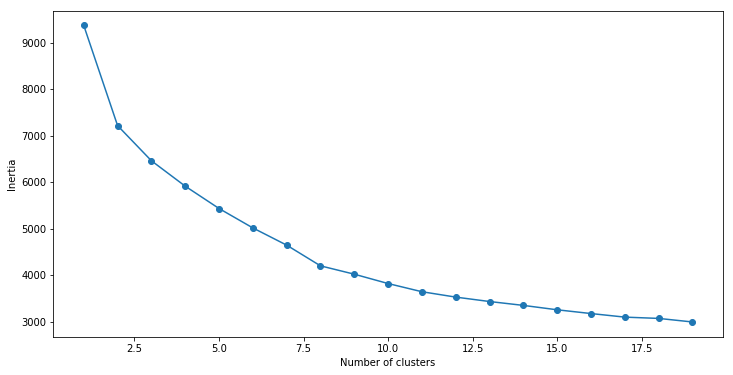

In [57]:
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = "k-means++")
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({"Cluster": range(1, 20), "SSE": SSE})
plt.figure(figsize = (12, 6))
plt.plot(frame["Cluster"], frame["SSE"], marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


### I chose 15 as the number of clusters, because it is not a massive data set and the curve seems to flatten at that point. 

#### Next, we fit the model with this number of clusters, and use it on our data set to label each row to a cluster

In [60]:
# k means using 15 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 15, init = 'k-means++')
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)
print(pred) # returns a list of clusters for each row

[14 13  0 ...  9  4  1]


## We now look for outliers: the clusters that have a very small population of rows (data points) associated with them

In [61]:
frame = pd.DataFrame(df_scaled)
frame["cluster"] = pred
frame["cluster"].value_counts()

4     208
3     127
6     122
0     111
2     106
14     80
7      77
5      61
1      58
12     55
13     51
9      41
11     37
10     36
8       1
Name: cluster, dtype: int64

## The 8th cluster has only one data point in it. Let's inspect that row.

In [63]:
frame.loc[frame.cluster == 8]

,0,1,2,3,4,5,6,7,cluster
467,0.476881,0.450635,0.235395,0.0,-1.783344,-0.437265,15.819346,1.260332,8


In [80]:
df = pd.DataFrame(df)
df = df.rename(columns = dict(zip(range(8), columns[1:])))
df.iloc[[467]]

,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood
467,172.5,81.9,27.5,37.640559,12.0,115.0,449.0,16.8


## The row above is anomalous. Although it does not appear so without the aid of an algorithm. This patient's record would be further inspected to determine if there was an error in the observations reported about this patient. 

In [1]:
df.iloc[[465, 466, 467, 468]]


NameError: name 'df' is not defined